# Sub question 5: Health care

Intro

Welke indicator is gebruikt?

Verschil tussen mannen en vrouw in health care. Dit visualiseren met behulp van een bar plot waar bars bovenop elkaar worden geplot. 

Grafiek van de verandering ontwikkelingen over de jaren heen per land. Met een lijn van man en een lijn van vrouw

subconclusion



In [1]:
# import World Bank data
import wbdata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from scipy import stats



In [3]:
#import csv van 15 slechtse landen
CPIA_worst15 = pd.read_csv("CPIA_worst15.csv")
CPIA_worst15["date"] = CPIA_worst15["date"].astype(int) 
# CPIA_worst15   

In [3]:
wbdata.get_source()


11	Africa Development Indicators
36	Statistical Capacity Indicators
31	Country Policy and Institutional Assessment
41	Country Partnership Strategy for India (FY2013 - 17)
1 	Doing Business
30	Exporter Dynamics Database ��� Indicators at Country-Year Level
12	Education Statistics
60	Economic Fitness
13	Enterprise Surveys
28	Global Financial Inclusion
33	G20 Financial Inclusion Indicators
14	Gender Statistics
15	Global Economic Monitor
27	Global Economic Prospects
32	Global Financial Development
34	Global Partnership for Education
29	The Atlas of Social Protection: Indicators of Resilience and Equity
63	Human Capital Index
16	Health Nutrition and Population Statistics
39	Health Nutrition and Population Statistics by Wealth Quintile
40	Population estimates and projections
62	International Comparison Program (ICP) 2011
18	IDA Results Measurement System
45	Indonesia Database for Policy and Economic Research
6 	International Debt Statistics
54	Joint External Debt Hub
25	Jobs
37	LAC Equity La

In [4]:
wbdata.get_indicator(source=16)

SH.MLR.NETS.ZS      	Use of insecticide-treated bed nets (% of under-5 population)
SH.MLR.INCD.P3      	Incidence of malaria (per 1,000 population at risk)
SH.MED.SAOP.P5      	Specialist surgical workforce (per 100,000 population)
SH.MED.PHYS.ZS      	Physicians (per 1,000 people)
SH.MED.NUMW.P3      	Nurses and midwives (per 1,000 people)
SH.MED.CMHW.P3      	Community health workers (per 1,000 people)
SH.MED.BEDS.ZS      	Hospital beds (per 1,000 people)
SH.IMM.POL3         	Immunization, Pol3 (% of one-year-old children)
SH.IMM.MEAS         	Immunization, measles (% of children ages 12-23 months)
SH.IMM.IDPT         	Immunization, DPT (% of children ages 12-23 months)
SH.IMM.IBCG         	Immunization, BCG (% of one-year-old children)
SH.IMM.HIB3         	Immunization, Hib3 (% of children ages 12-23 months)
SH.IMM.HEPB         	Immunization, HepB3 (% of one-year-old children)
SH.HIV.TOTL         	Adults (ages 15+) and children (0-14 years) living with HIV
SH.HIV.PMTC.ZS      	Antir

In [ ]:
#Deelvraag 5
#HD.HCI.EYRS.MA   	Expected Years of School, Male
#HD.HCI.EYRS.FE   	Expected Years of School, Female
#HD.HCI.EYRS      	Expected Years of School
#HD.HCI.OVRL.MA      	Human Capital Index (HCI), Male (scale 0-1)
#HD.HCI.OVRL.FE      	Human Capital Index (HCI), Female (scale 0-1)


In [11]:
# Mortality Rates
wbdata.get_data("SP.DYN.AMRT.MA")    # 	Mortality rate, adult, male (per 1,000 male adults)
wbdata.get_data("SP.DYN.AMRT.FE")   # 	Mortality rate, adult, female (per 1,000 female adults)

# Surival rates
wbdata.get_data("HD.HCI.AMRT.MA")  # 	Survival Rate from Age 15-60, Male
wbdata.get_data("HD.HCI.AMRT.FE")  # 	Survival Rate from Age 15-60, Female
wbdata.get_data("HD.HCI.AMRT")     # 	Survival Rate from Age 15-60
wbdata.get_data("SP.DYN.TO65.MA.ZS")  # 	Survival to age 65, male (% of cohort)
wbdata.get_data("SP.DYN.TO65.FE.ZS")  # 	Survival to age 65, female (% of cohort)



[{'indicator': {'id': 'SP.DYN.TO65.FE.ZS',
   'value': 'Survival to age 65, female (% of cohort)'},
  'country': {'id': '1A', 'value': 'Arab World'},
  'value': None,
  'decimal': '0',
  'date': '2017'},
 {'indicator': {'id': 'SP.DYN.TO65.FE.ZS',
   'value': 'Survival to age 65, female (% of cohort)'},
  'country': {'id': '1A', 'value': 'Arab World'},
  'value': '80.2981205427993',
  'decimal': '0',
  'date': '2016'},
 {'indicator': {'id': 'SP.DYN.TO65.FE.ZS',
   'value': 'Survival to age 65, female (% of cohort)'},
  'country': {'id': '1A', 'value': 'Arab World'},
  'value': '80.0131086316622',
  'decimal': '0',
  'date': '2015'},
 {'indicator': {'id': 'SP.DYN.TO65.FE.ZS',
   'value': 'Survival to age 65, female (% of cohort)'},
  'country': {'id': '1A', 'value': 'Arab World'},
  'value': '79.7297608167585',
  'decimal': '0',
  'date': '2014'},
 {'indicator': {'id': 'SP.DYN.TO65.FE.ZS',
   'value': 'Survival to age 65, female (% of cohort)'},
  'country': {'id': '1A', 'value': 'Arab W

In [4]:
def clean(dataset):
    #create data frame
    name = pd.DataFrame(wbdata.get_data(dataset))
    
    #clean the date
    name['country_code'] = name.country.astype(str).str.slice(8,10)
    name['country'] = name.country.astype(str).str.slice(23,-2)
    name['indicator'] = name.indicator.astype(str).str.slice(35,-2)
    name["date"] = name["date"].astype(int) 
    name["value"] = name["value"].astype(float).round(2)
    
    CPIA_worst15 = pd.read_csv("CPIA_worst15.csv")
    CPIA_worst15["date"] = CPIA_worst15["date"].astype(int) 
    
    years = name.loc[(name['date'] >= 2007) & (name['date'] <= 2017)]

    years_worst = years[years.country.isin(list(CPIA_worst15.country))]
    years_worst_sorted = years_worst.sort_values(by='date',ascending=True)
    
    for i in years_worst_sorted.country.unique():
        years_worst_sorted.loc[years_worst_sorted['country'] == i]  = years_worst_sorted.loc[(years_worst_sorted['country'] == i)].ffill().bfill()
    return years_worst_sorted

In [5]:
def graph(dataframe, title_graph, x_label, y_label):
    # visualiseren van verandering per land

    fig,ax = plt.subplots(figsize=(30, 15))

    for name in dataframe["country"].unique():
        ax.plot(dataframe[dataframe.country==name].date,dataframe[dataframe.country==name].value,label=name)

    #change size and location of legend
    ax.legend(loc=(1.1, 0.2), fontsize = 'xx-large')

    #tekst op x en y-as
    plt.xticks(rotation = 65, fontsize = 20)
    plt.yticks(fontsize = 20)

    #labels
    plt.title(title_graph, fontsize = 30)
    plt.xlabel(x_label, fontsize = 25)
    plt.ylabel(y_label, fontsize = 25)
    
    return


In [6]:
# Creating the data frames 
AMRT_FEMALE_years = clean("SP.DYN.AMRT.FE")
AMRT_MALE_years = clean("SP.DYN.AMRT.MA")
SURV_MALE_years = clean("SP.DYN.TO65.MA.ZS")
SURV_FEMALE_years = clean("SP.DYN.TO65.FE.ZS")

In [7]:
#functie om gemiddelde over de landen te nemen
def mean_countries(dataframe):
    mean = dataframe.groupby('date', as_index=False).mean()
    return mean

In [8]:
# gemiddelde van alle worst 15 landen per jaar voor vrouwen/mannen
mean_SURV_FEMALE = mean_countries(SURV_FEMALE_years)
mean_SURV_MALE = mean_countries(SURV_MALE_years)
# mean_MALE

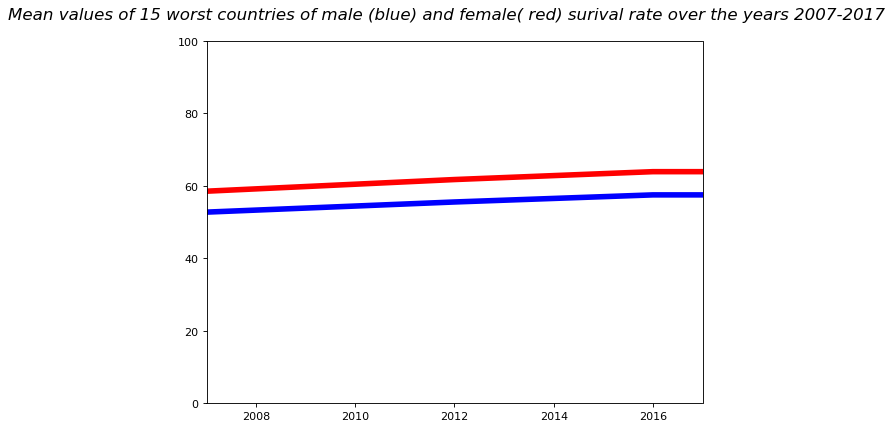

In [9]:
# Create a figure of size 8x6 inches, 80 dots per inch
plt.figure(figsize=(8, 6), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(1, 1, 1)

X = mean_SURV_MALE.date.values
M, F = mean_SURV_MALE.value.values, mean_SURV_FEMALE.value.values

# Plot cosine with a blue continuous line of width 1 (pixels)
plt.plot(X, M, color="Blue", linewidth=5.0, linestyle="-")

# Plot sine with a green continuous line of width 1 (pixels)
plt.plot(X, F, color="Red", linewidth=5.0, linestyle="-")

# Set x limits
plt.xlim(2007, 2017,1)

# Set x ticks


# Set y limits
plt.ylim(0, 100)

plt.suptitle("Mean values of 15 worst countries of male (blue) and female( red) surival rate over the years 2007-2017", fontsize=15, fontweight=0, color='black', style='italic', y=0.95)

# Save figure using 72 dots per inch
# plt.savefig("exercice_2.png", dpi=72)

# Show result on screen
plt.show()

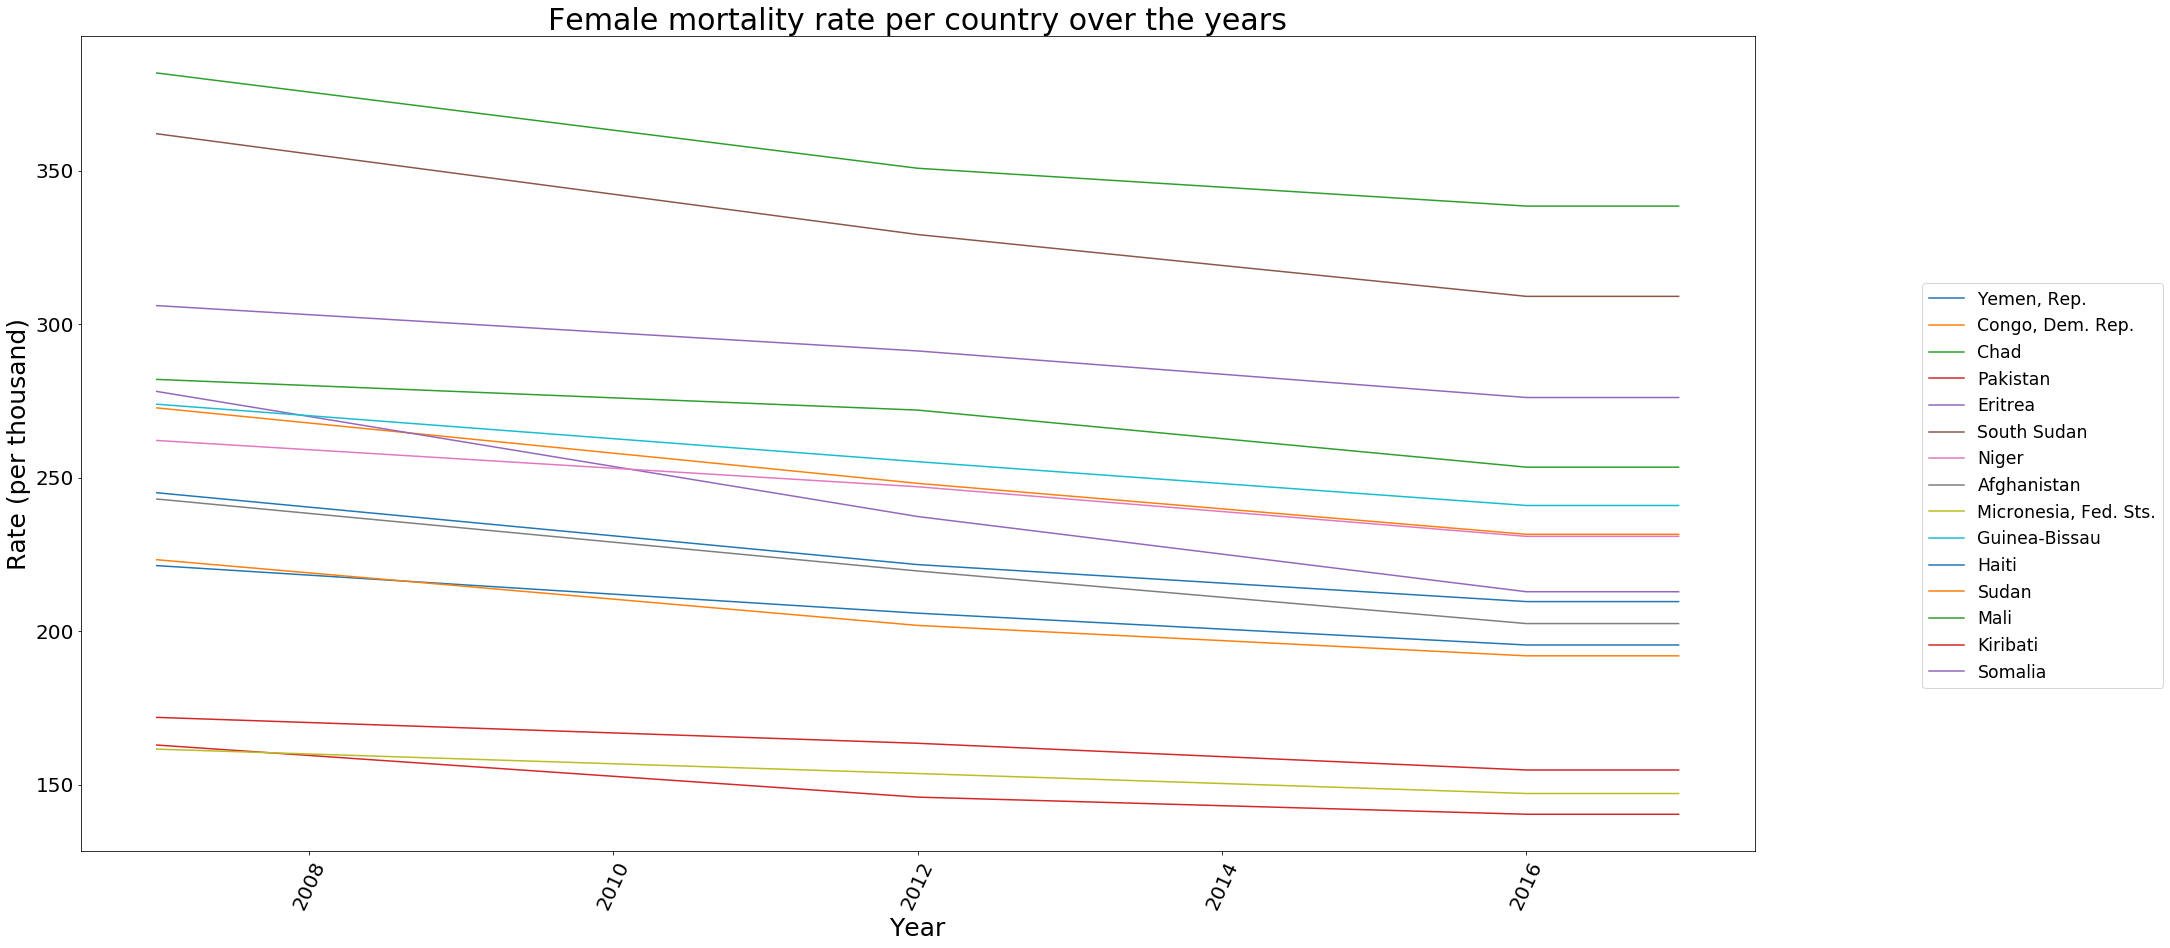

In [133]:
graph(AMRT_FEMALE_years,"Female mortality rate per country over the years","Year", "Rate (per thousand)")

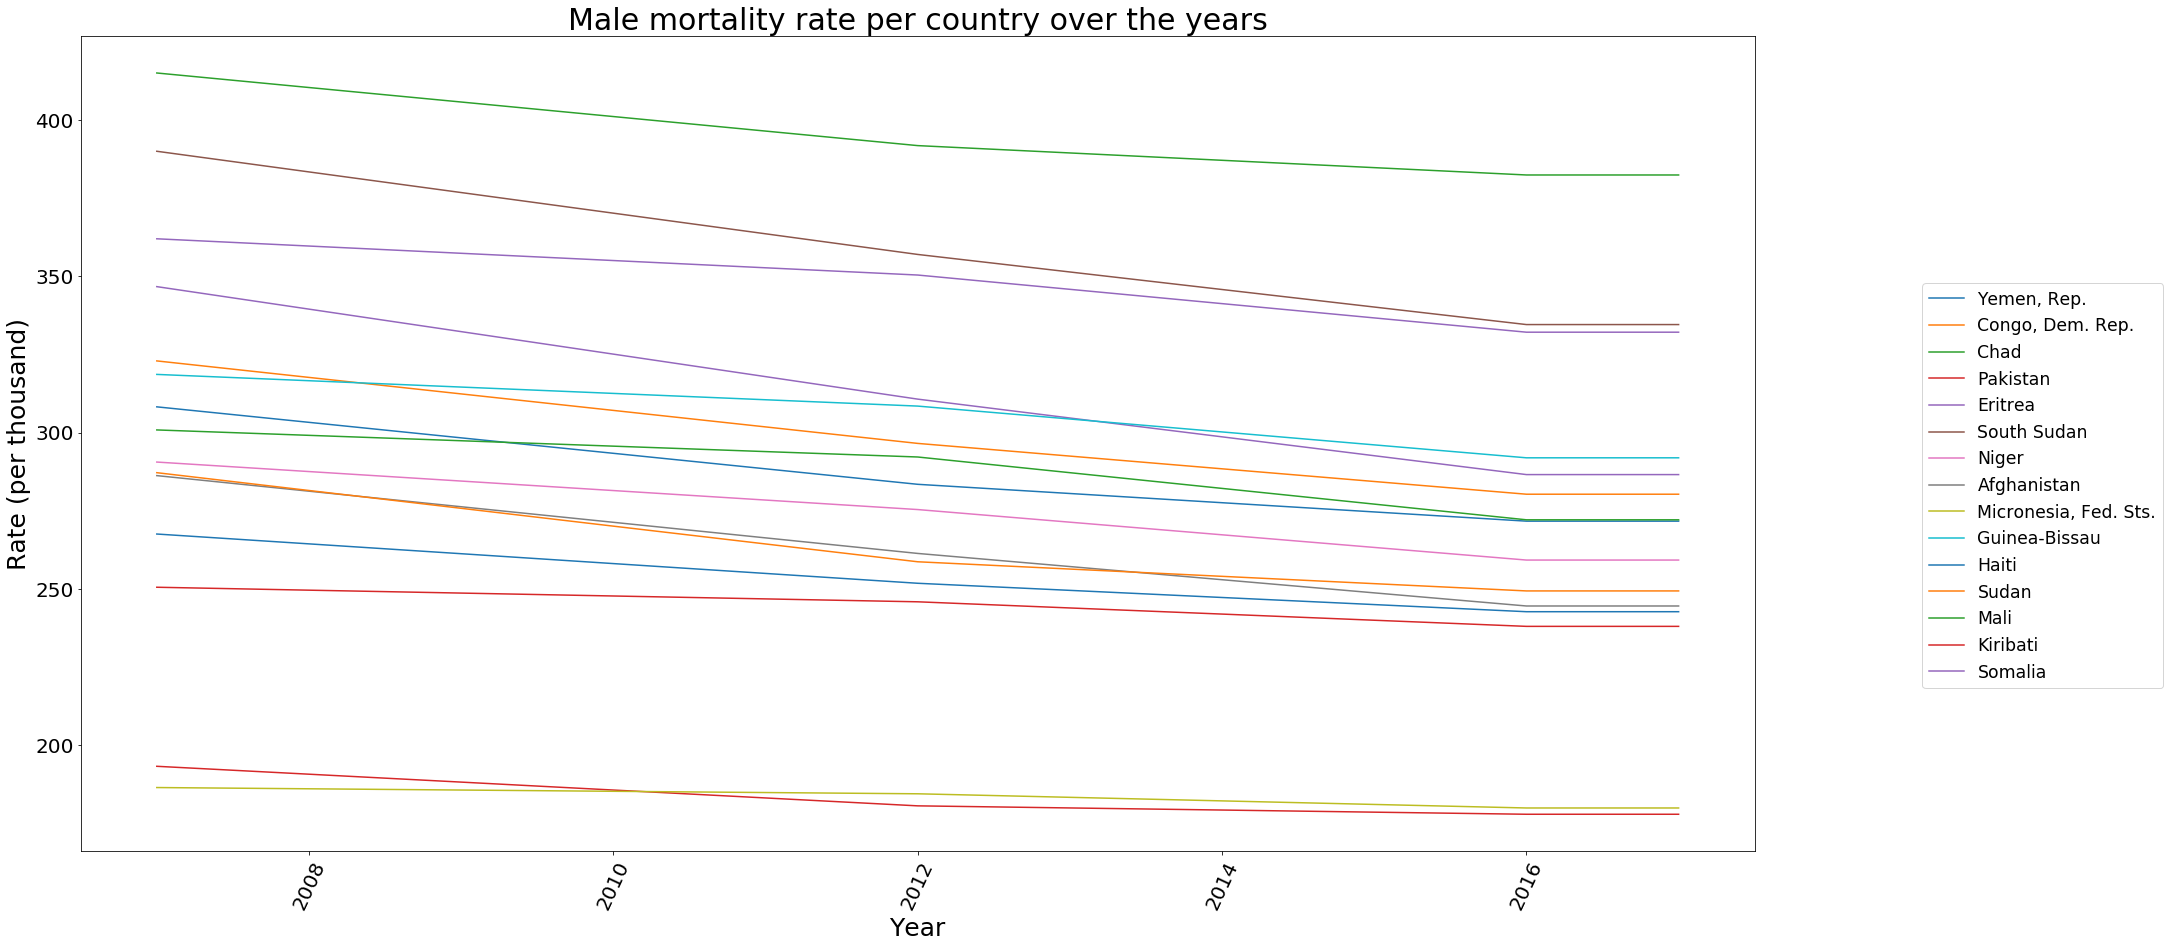

In [134]:
graph(AMRT_MALE_years,"Male mortality rate per country over the years","Year", "Rate (per thousand)")

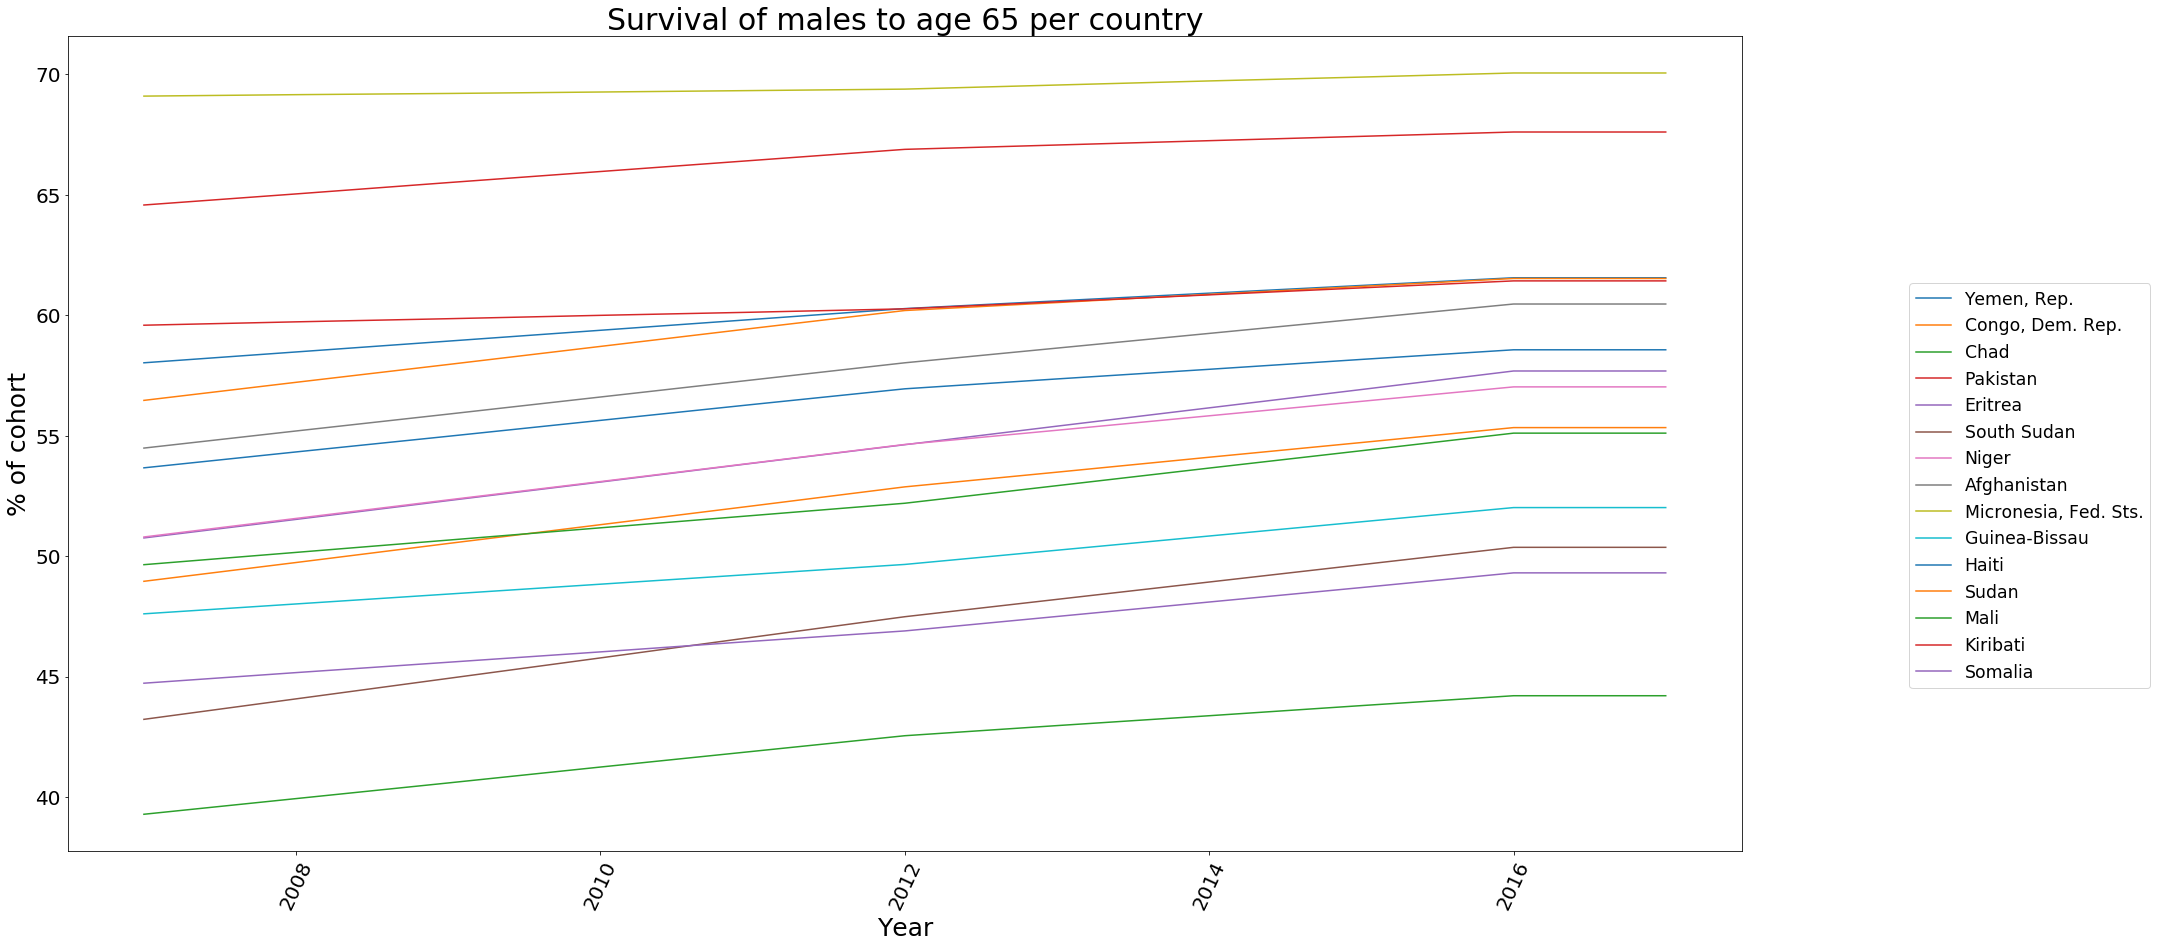

In [135]:
graph(SURV_MALE_years,"Survival of males to age 65 per country","Year", "% of cohort")

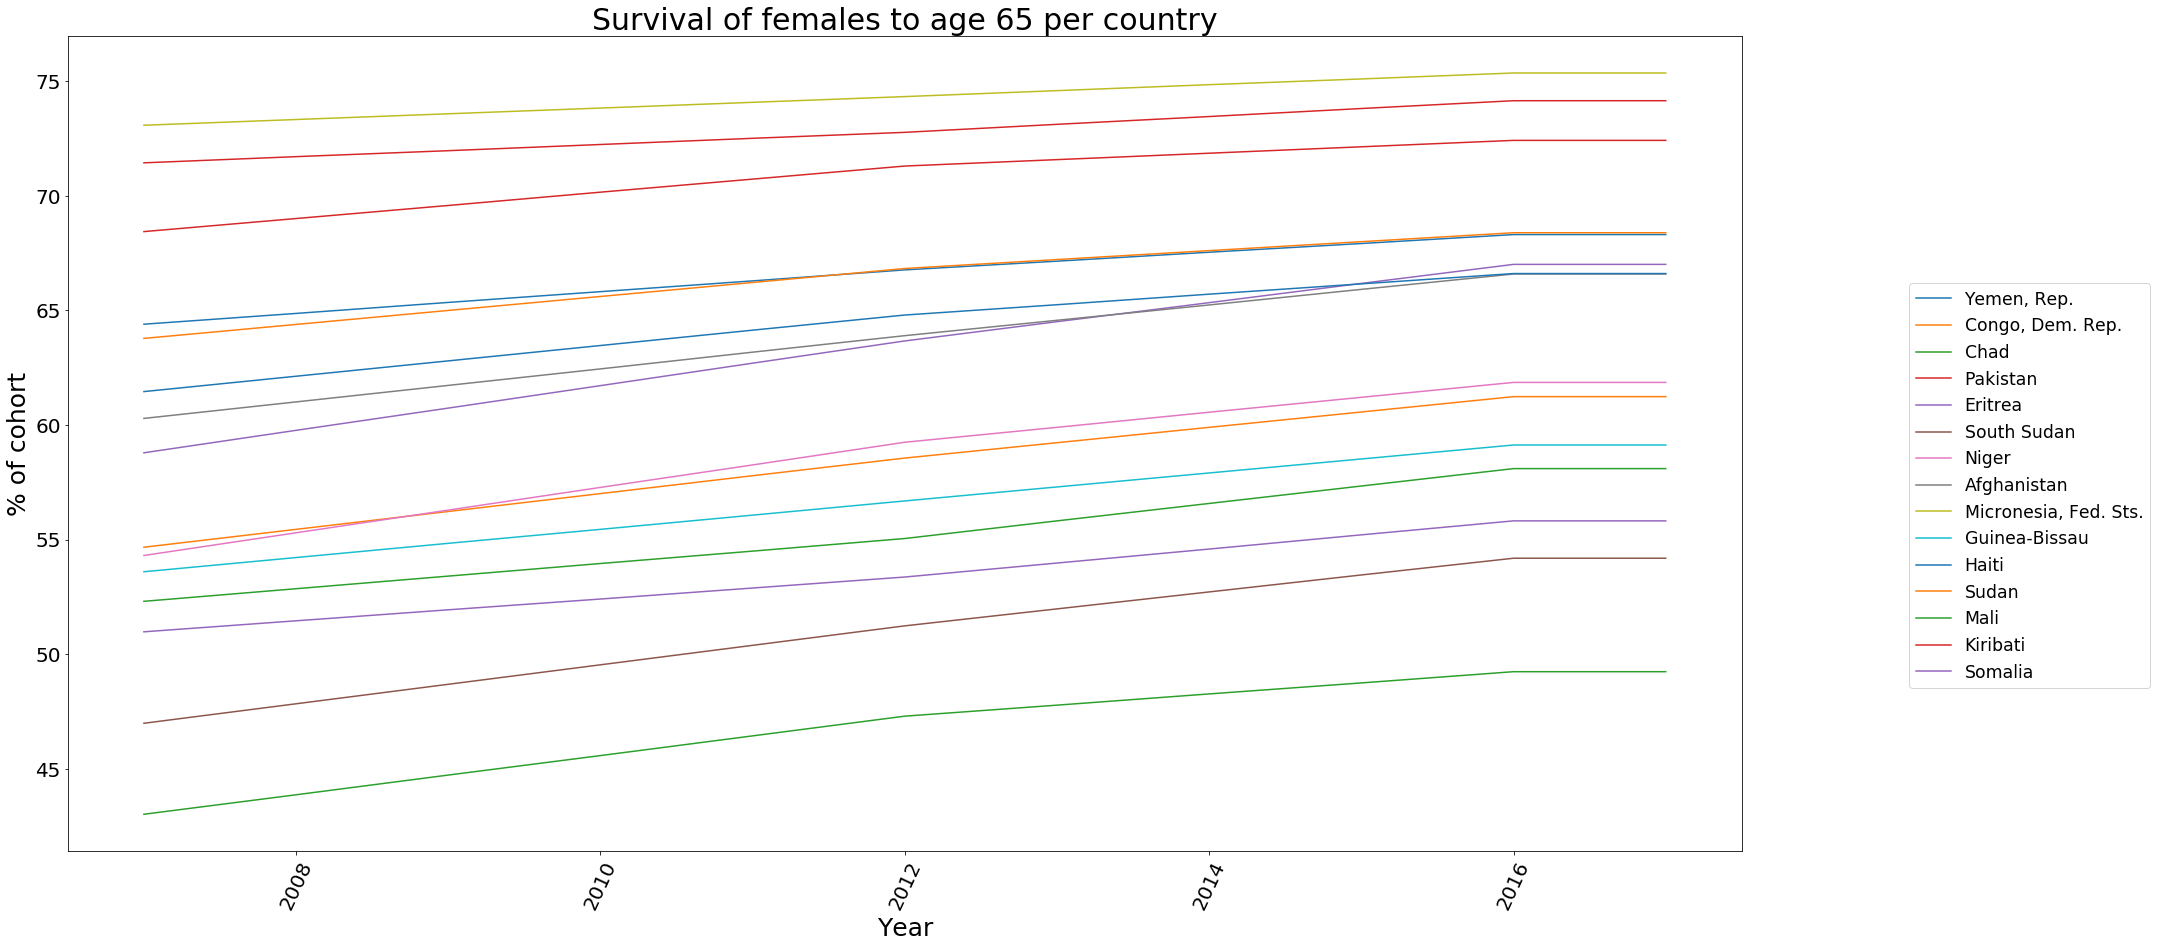

In [136]:
graph(SURV_FEMALE_years,"Survival of females to age 65 per country","Year", "% of cohort")